In [1]:
# Libraries

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib_venn import venn2
from collections import Counter
from pprint import pprint

%matplotlib inline

In [2]:
# Dataset

print(os.listdir('./dataset'))

['campaign_data.csv', 'mongo_to_csv.py', '__pycache__', 'campaign_descirbe.md', 'devfest-registered.xlsx', 'devtalks_describe.md', 'registrations_describe.md', 'devfest.csv', 'devfest_describe.md', 'teams_describe.md', 'devtalks.csv', 'credentials.py', 'devfest-teams.xlsx']


## Registered individuals
----

In [3]:
# Registered users dataset

ind = pd.read_excel('./dataset/devfest-registered.xlsx', dtype=object)

print('Individuals')
print('Shape: ', ind.shape)

Individuals
Shape:  (487, 10)


In [4]:
# Data head

ind.head(3)

,Name,Email,Registered At,City,Graduation Year,College,Resume,Gender,Phone Number,Stream
0,Meher,meherdeept@gmail.com,"Sep 04, 2018 03:24 PM IST",L666,2020,Vellore Institute of Technology - Vellore,NaN,Male,917299430575,CSE
1,Dhruv,mittaldhruv29@gmail.com,"Sep 04, 2018 05:53 PM IST",vellore,2021,Vellore Institute of Technology - Vellore,NaN,Male,+919111883363,CSE
2,Ayush Verma,vermaayush.verma76@gmail.com,"Sep 04, 2018 10:18 PM IST","Vellore, Tamil Nadu, India",2020,Vellore Institute of Technology - Vellore,https://files.hackerearth.com/d3J4UzB2UHZ2aGxN...,Male,917010725407,Computer science and technology


In [5]:
# Description

print('Columns')
print(ind.columns)

Columns
Index(['Name', 'Email', 'Registered At', 'City', 'Graduation Year', 'College',
       'Resume', 'Gender', 'Phone Number', 'Stream'],
      dtype='object')


In [6]:
# Column - Name

print('Name')
print('Unique value count: ', ind['Name'].nunique())

Name
Unique value count:  473


In [7]:
# Column - Email

print('Email')
print('Unique value count: ', ind['Email'].nunique())

Email
Unique value count:  487


In [8]:
# Column - City

print('City')
print('Unique value count: ', ind['City'].nunique())

City
Unique value count:  117


In [9]:
# Column - Graduation year

print('Graduation Year')
print('Unique value count: ', ind['Graduation Year'].nunique())
pprint(Counter(ind['Graduation Year']))

Graduation Year
Unique value count:  12
Counter({'2020': 204,
         '2021': 153,
         '2022': 47,
         '2019': 34,
         nan: 25,
         '2018': 6,
         '2016': 6,
         '2017': 5,
         '2013': 2,
         '2023': 2,
         '1987': 1,
         '2002': 1,
         '2015': 1})


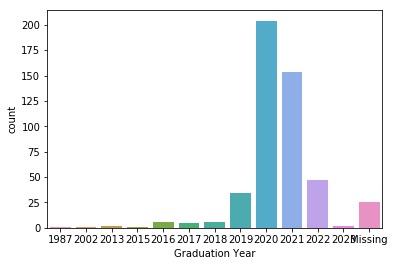

In [10]:
# Graduation Year plot
# Countplot

gyear = ind['Graduation Year'].copy()
gyear = gyear.fillna('Missing').sort_values(ascending=True)

sns.countplot(gyear)

In [11]:
# Column - College

print('College')
print('Unique value count: ', ind['College'].nunique())

College
Unique value count:  82


In [12]:
# Column - Resume

print('Resume')
print('Uploaded resume count: ', ind.shape[0] - ind['Resume'].isna().sum())
print((ind.shape[0] - ind['Resume'].isna().sum())/ind.shape[0] * 100, '% of the individuals uploaded a resume' )

Resume
Uploaded resume count:  88
18.069815195071868 % of the individuals uploaded a resume


In [13]:
# Column - Gender

print('Gender')
print('Unique value count: ', ind['Gender'].nunique())
pprint(Counter(ind['Gender']))

Gender
Unique value count:  2
Counter({'Male': 422, 'Female': 34, nan: 31})


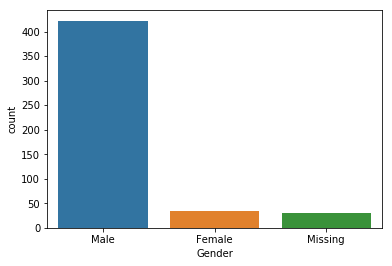

In [14]:
# Gender type plot
# Countplot

gen = ind['Gender'].copy()
gen = gen.fillna('Missing')
sns.countplot(gen)

In [15]:
# Column - Phone Number

print('Phone Number')
print('Unique value count: ', ind['Phone Number'].nunique())

Phone Number
Unique value count:  446


In [16]:
# Convert phone numbers to 10 digit standard format
# Parameters:
# data - phone number (any format)
# Return:
# Parsed 10 digit phone number

def parse_mobno(data):
    data = str(data)
    return data[-10:]

In [17]:
# Parsing phone number

print('Sample: ', ind['Phone Number'][0])

print('\nParsing...\n')
ind['Phone Number'] = ind['Phone Number'].apply(parse_mobno)

print('Sample: ', ind['Phone Number'][0])

Sample:  917299430575

Parsing...

Sample:  7299430575


In [18]:
# Column - Stream

print('Stream')
print('Unique value count: ', ind['Stream'].nunique())

Stream
Unique value count:  83


In [19]:
# Column - Registered At

print('Registered At')
print('Unique value count: ', ind['Registered At'].nunique())

Registered At
Unique value count:  460


In [20]:
# Convert str to datetime
# Parameters: 
# data - String data format
# Return:
# datetime object

def convert_to_datetime(data):
    return datetime.strptime(data[:-4], '%b %d, %Y %I:%M %p')

In [21]:
# Type conversion to datatime

print('Type of Registered At: ', type(ind['Registered At'][0]))
print('Sample: ', ind['Registered At'][0])

print('\nConverting...\n')
ind['Registered At'] = ind['Registered At'].apply(convert_to_datetime)

print('Type of Registered At: ', type(ind['Registered At'][0]))
print('Sample: ', ind['Registered At'][0])

Type of Registered At:  <class 'str'>
Sample:  Sep 04, 2018 03:24 PM IST

Converting...

Type of Registered At:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Sample:  2018-09-04 15:24:00


In [22]:
# Splitting datetime into date and time

ind['date'] = [d.date() for d in ind['Registered At']]
ind['time'] = [d.time() for d in ind['Registered At']]

ind.head(2)

,Name,Email,Registered At,City,Graduation Year,College,Resume,Gender,Phone Number,Stream,date,time
0,Meher,meherdeept@gmail.com,2018-09-04 15:24:00,L666,2020,Vellore Institute of Technology - Vellore,NaN,Male,7299430575,CSE,2018-09-04,15:24:00
1,Dhruv,mittaldhruv29@gmail.com,2018-09-04 17:53:00,vellore,2021,Vellore Institute of Technology - Vellore,NaN,Male,9111883363,CSE,2018-09-04,17:53:00


In [23]:
# Date analysis

print('Start date: ', ind['Registered At'].min())
print('End date: ', ind['Registered At'].max())

Start date:  2018-09-04 15:24:00
End date:  2018-10-01 23:30:00


In [24]:
# Group by date

day_count = ind.groupby(['date'])['Email'].count()

print('Day count')
print(day_count[:5])

Day count
date
2018-09-04    8
2018-09-05    6
2018-09-06    3
2018-09-08    5
2018-09-09    2
Name: Email, dtype: int64


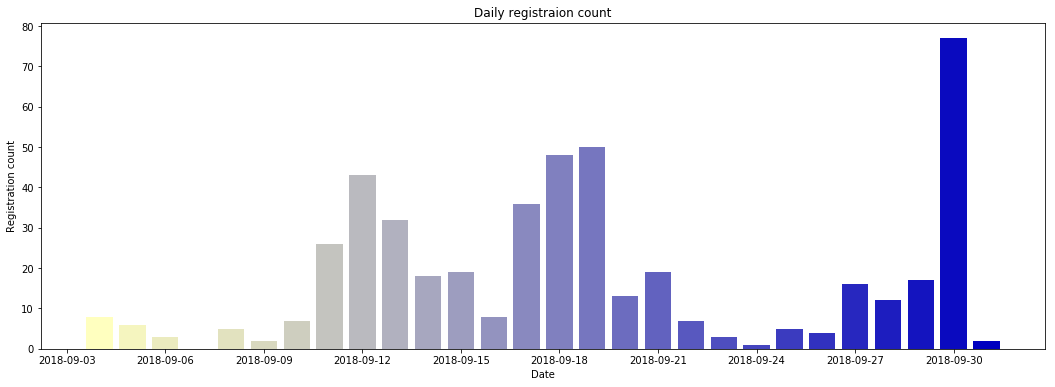

In [27]:
# Day wise registrations plot

fig= plt.figure(figsize=(18,6))

days = list(day_count.keys())
colors = [(x, x, 0.75) for x in [i for i in np.linspace(1,0,len(days))]]

plt.bar(days, day_count, color=colors)
plt.title('Daily registraion count')
plt.xlabel('Date')
plt.ylabel('Registration count')
plt.show()

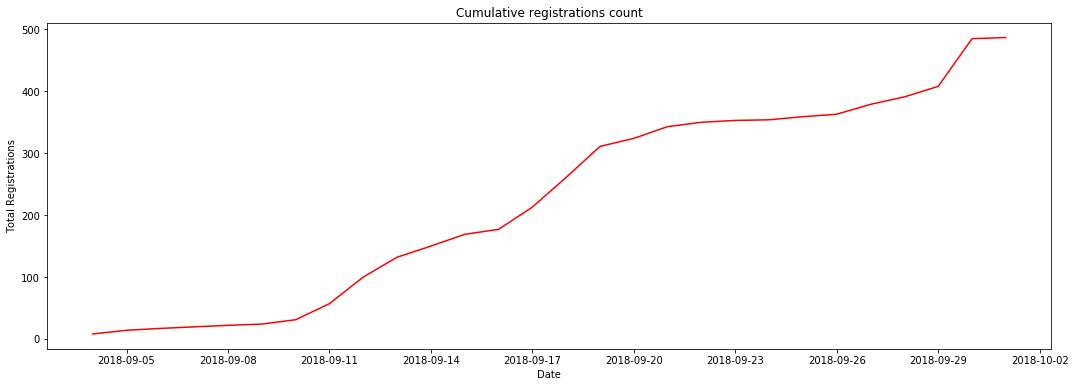

In [28]:
# Day wise total registrations plot

fig= plt.figure(figsize=(18,6))

plt.plot(days, np.array(day_count).cumsum(), 'red')
plt.title('Cumulative registrations count')
plt.xlabel('Date')
plt.ylabel('Total Registrations')
plt.show()